<a href="https://colab.research.google.com/github/afcalderon/CauseEffectChallenge/blob/master/Domino_Trace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as ex
import scipy.stats as sp
import random as r

In [ ]:
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    #if not nx.is_tree(G):
    #    raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
 
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos


    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)

In [ ]:
A = np.zeros(shape=(61, 61), dtype=int)
A[0, 1] = 1
A[0, 2] = 1
A[0, 3] = 1
for i in range(1, 9, 3):
  A[i, i+3]   = 1
  A[i+1, i+4] = 1
  A[i+2, i+5] = 1

A[10, 13] = 1
A[10, 14] = 1
A[11, 15] = 1
A[11, 16] = 1
A[11, 17] = 1
A[12, 18] = 1
A[12, 19] = 1

for i in range(13, 13+(3*7), 7):
  for j in range(0,7):
    A[i+j, i+j+7]  = 1

A[34, 41] = 1
A[35, 42] = 1
A[35, 43] = 1
A[36, 44] = 1
A[37, 44] = 1
A[38, 45] = 1
A[39, 45] = 1

for i in range(41, 41+(3*5), 5):
  for j in range(0,5):
    A[i+j, i+j+5]  = 1

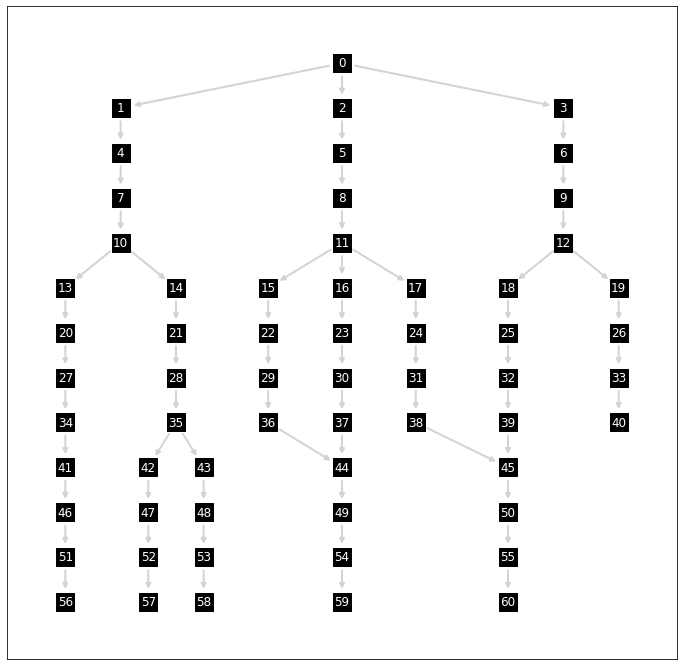

In [ ]:
D = nx.DiGraph(A, directed=True)
pos = hierarchy_pos(D,0) 
options = {
    'node_color': 'black',
    'font_color': 'white',
    'edge_color': 'lightgrey',
    'node_size': 350,
    'node_shape': 's',
    'width': 2,
    'arrowstyle': '-|>',
    'arrowsize': 10,
}
plt.figure(num=None, figsize=(12, 12))
nx.draw_networkx(D, pos, arrows=True, **options)
plt.show()

In [ ]:
p = 0.01
eps = .1
N = 10000
X = np.zeros(shape=(61, N), dtype=int)
X[0, :] = np.random.binomial(1, p, size=N)
for i in range(1, 61):
  parents = np.where(A[:,i] == 1)[0]
  X[i, :] = np.ones_like(X[i, :])
  for a in parents:
    noise = np.random.binomial(1, eps, size=N)
    X[i, :] = X[i,:]*[(1-noise[j])*X[a,j]+noise[j]*(1-X[a,j]) for j in range(N)]
#  noise = np.random.binomial(1, eps, size=N)
#  X[i, :] = [noise[j]*(1-X[i,j]) for j in range(N)] # invert the values according to noise
theta = X.sum(axis=1)/N

In [ ]:
ex.histogram(x=theta, range_x=(-0.1,1), labels={'x': 'expectation'}, width=1000)

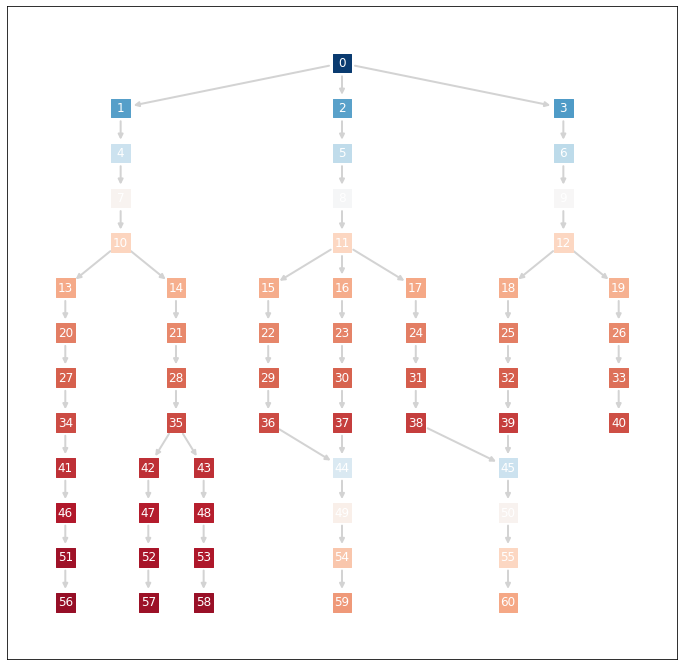

In [ ]:
D = nx.DiGraph(A, directed=True)
pos = hierarchy_pos(D,0) 
options = {
    'edge_color': 'lightgrey',
    'font_color': 'white',
    'node_size': 350,
    'node_shape': 's',
    'width': 2,
    'arrowstyle': '-|>',
    'arrowsize': 10,
}
plt.figure(num=None, figsize=(12, 12))
nx.draw_networkx(D, pos, arrows=True, vmin=0, vmax= .5, node_color=theta, cmap=plt.cm.get_cmap('RdBu_r'), **options)
plt.show()

In [ ]:
node_selection = [1, 10, 56, 35, 57, 2, 11, 36, 37, 59, 38, 12, 40, 45, 60]
causal_edges = [(1,10),(1,56),(10,56),(1,35),(10,35),(1,57),(10,57),(35,57),(2,11),(2,36),(2,37),(2,59),(11,36),(11,37),(11,59),(36,59),(37,59),(2,38),(2,45),(2,60),(11,38),(11,45),(11,60),
                (12,40),(12,45),(12,60),(45,60)]

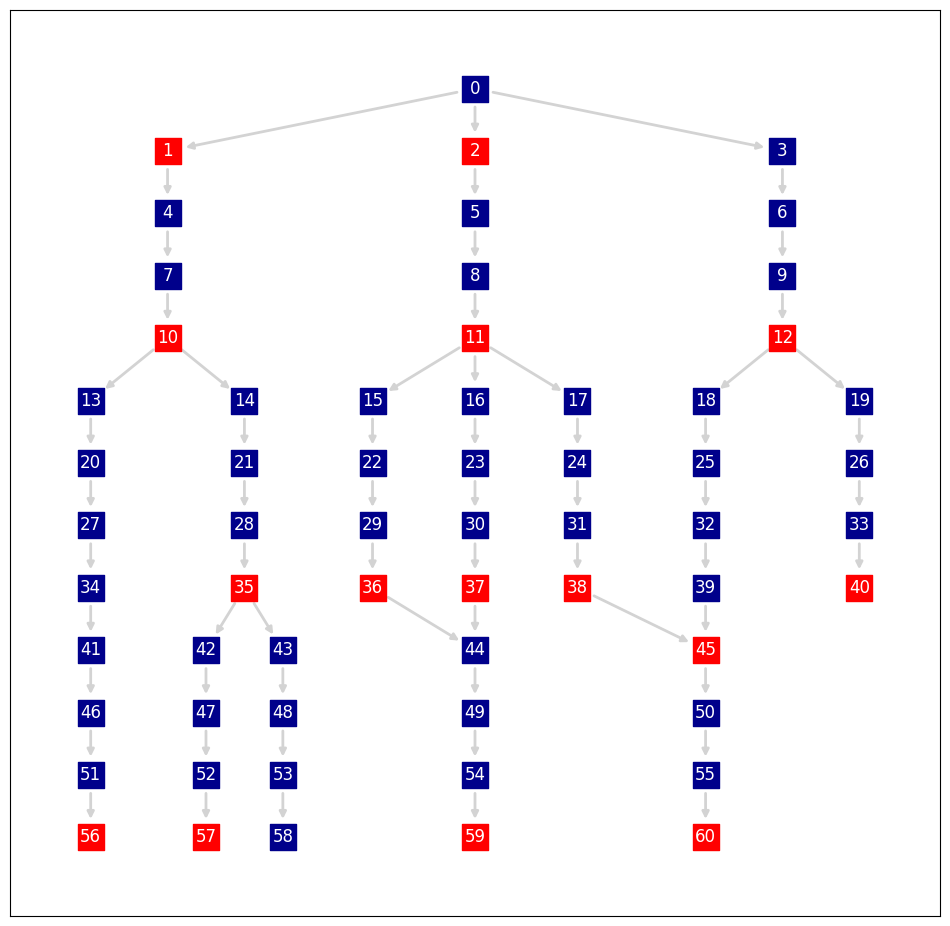

In [ ]:
D = nx.DiGraph(A, directed=True)
pos = hierarchy_pos(D,0) 
options = {
    'edge_color': 'lightgrey',
    'font_color': 'white',
    'node_size': 350,
    'node_shape': 's',
    'width': 2,
    'arrowstyle': '-|>',
    'arrowsize': 10,
}
node_colors = ['red' if n in node_selection else 'darkblue' for n in D.nodes()]
plt.figure(num=None, figsize=(12, 12), dpi=100)
nx.draw_networkx(D, pos, arrows=True, node_color=node_colors, **options)
plt.show()

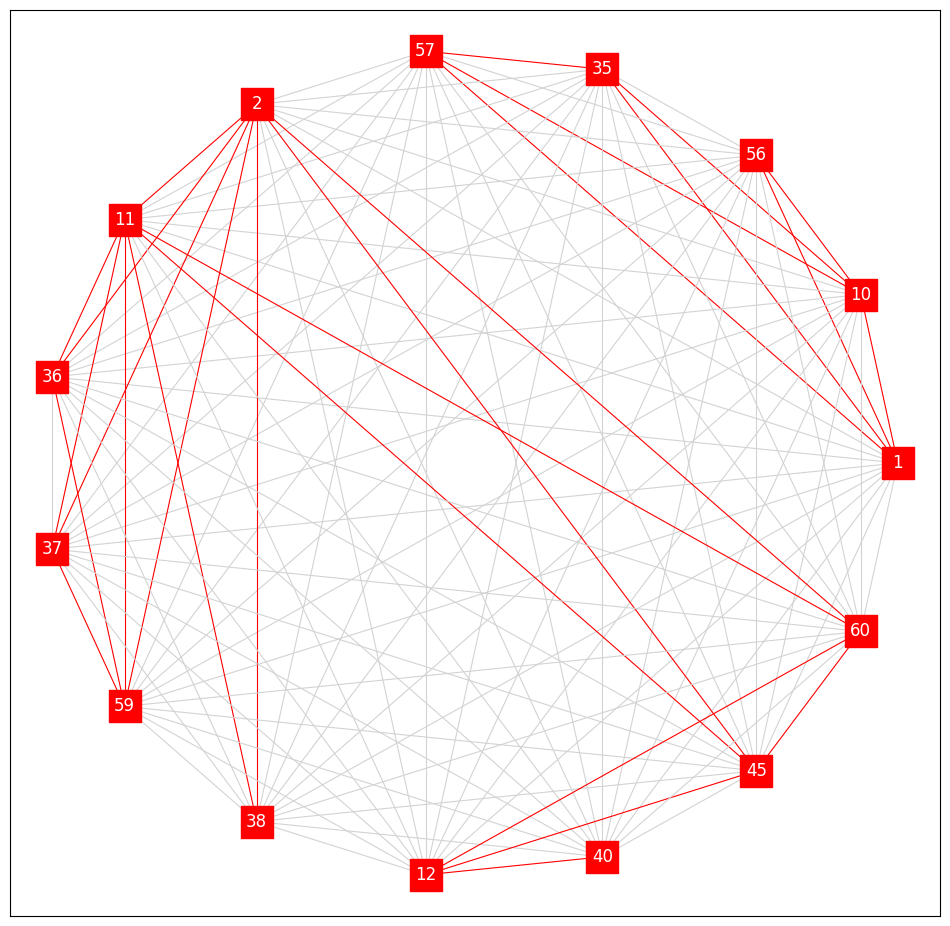

In [ ]:
label_mapping = {i:node_selection[i] for i in range(15)}
B = np.ones(shape=(15, 15), dtype=int)
D = nx.Graph(B, directed=True)
D = nx.relabel_nodes(D, label_mapping)
options = {
#    'edge_color': 'lightgrey',
    'font_color': 'white',
    'node_size': 500,
    'node_shape': 's',
    'node_color': 'red',
    'width':.8
}
causal_edge_colors = ['red' if (u,v) in causal_edges else 'lightgrey' for u, v in D.edges()]
plt.figure(num=None, figsize=(12, 12), dpi=100)
pos = nx.circular_layout(D)
nx.draw_networkx(D, pos, edge_color= causal_edge_colors, **options)
plt.show()

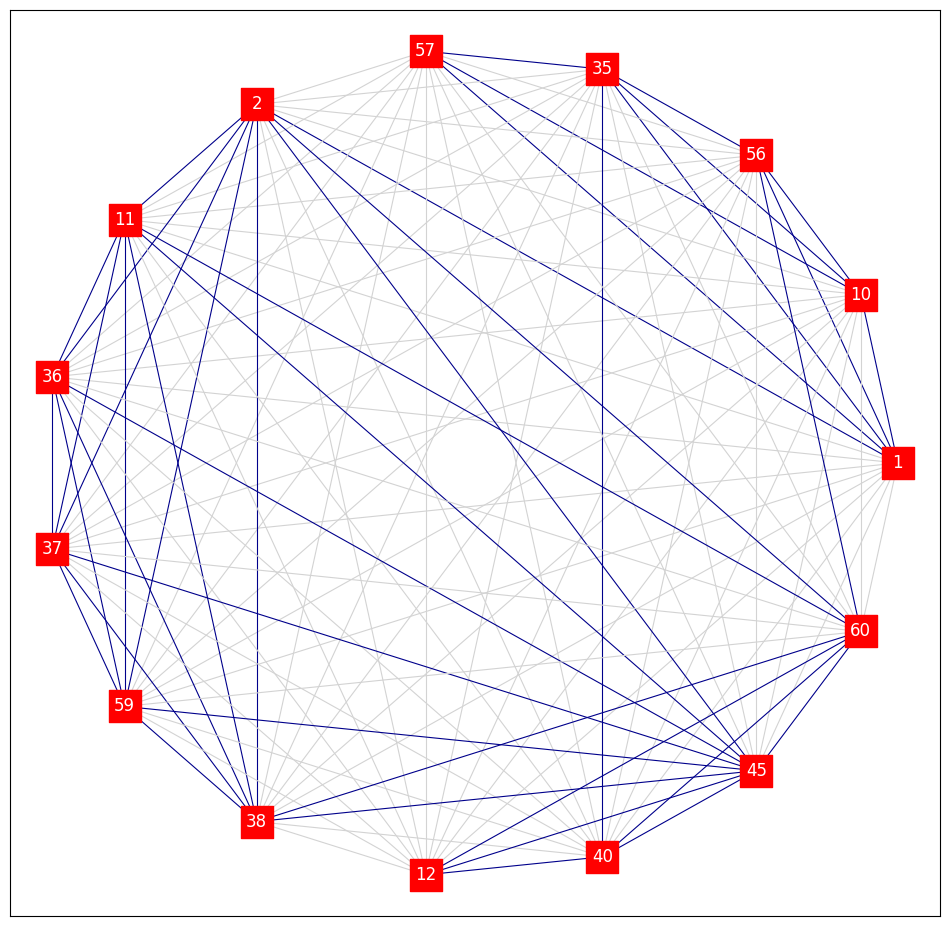

In [ ]:
p_values = []
for u, v in D.edges():    
  a = pd.Categorical(X[u,:])
  b = pd.Categorical(X[v,:])
  #pd.crosstab(u, v)
  #chi2, p, dof, ex = sp.chi2_contingency(pd.crosstab(a, b))
  odds, p = sp.fisher_exact(pd.crosstab(a,b))
  p_values.append(p)

label_mapping = {i:node_selection[i] for i in range(15)}
B = np.ones(shape=(15, 15), dtype=int)
D = nx.Graph(B, directed=True)
D = nx.relabel_nodes(D, label_mapping)
options = {
#    'edge_color': 'lightgrey',
    'font_color': 'white',
    'node_size': 500,
    'node_shape': 's',
    'node_color': 'red',
    'width':.8
}
significant_edge_colors = ['darkblue' if p < .01 else 'lightgrey' for p in p_values]
plt.figure(num=None, figsize=(12, 12), dpi=100)
pos = nx.circular_layout(D)
nx.draw_networkx(D, pos, edge_color=significant_edge_colors, **options)
plt.show()

# PC-Algorithm

In [ ]:
!pip install cdt

     |████████████████████████████████| 921kB 7.0MB/s 
  Created wheel for GPUtil: filename=GPUtil-1.4.0-cp37-none-any.whl size=7411 sha256=48a54fc19571883edb840b05c1a5c47bd235c2bb81d0251dfaaa82b3dd2dcfdf
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
  Created wheel for skrebate: filename=skrebate-0.62-cp37-none-any.whl size=29256 sha256=951f6ea5bfc18cd89eb68bd21bb23f8cea87c2283545fa369807860f363f6721
  Stored in directory: /root/.cache/pip/wheels/6b/0e/2f/540392932d3a01060f04c242d3b9bee80dfd87f63d80b3a9a0
Successfully built GPUtil skrebate


In [ ]:
import cdt

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


In [ ]:
%load_ext rpy2.ipython

In [ ]:
!pip install pcalg

  Created wheel for pcalg: filename=pcalg-0.1.9-cp37-none-any.whl size=5602 sha256=c9f8edb09f61219e9508828a9b4b1213c9cb6ed68f03d5816530a0ca1c4937be
  Stored in directory: /root/.cache/pip/wheels/ac/a0/7d/170748336032d860f2cb3f9dd1676ff24218e0dd463561ebdc
  Created wheel for gsq: filename=gsq-0.1.6-cp37-none-any.whl size=34180 sha256=e1d9e2f9712f0dd5370354644c2537592bc0e3eeb58094feacd5cbf08550e432
  Stored in directory: /root/.cache/pip/wheels/97/b1/4d/5c16f9ab02d140a0ec0ae40d10a5472ca21fb731d17dc9d4c2
Successfully built pcalg gsq


In [ ]:
%%R
require("pcalg")
require("RCIT")

array([[0, 0, 1, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 1, 1, 0, 1],
       ...,
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [ ]:
X_tp = np.transpose(X)
(skel, sep_set) = estimate_skeleton(indep_test_func=ci_test_bin, data_matrix=X_tp, alpha=0.01)

divide by zero encountered in log
invalid value encountered in multiply
invalid value encountered in true_divide


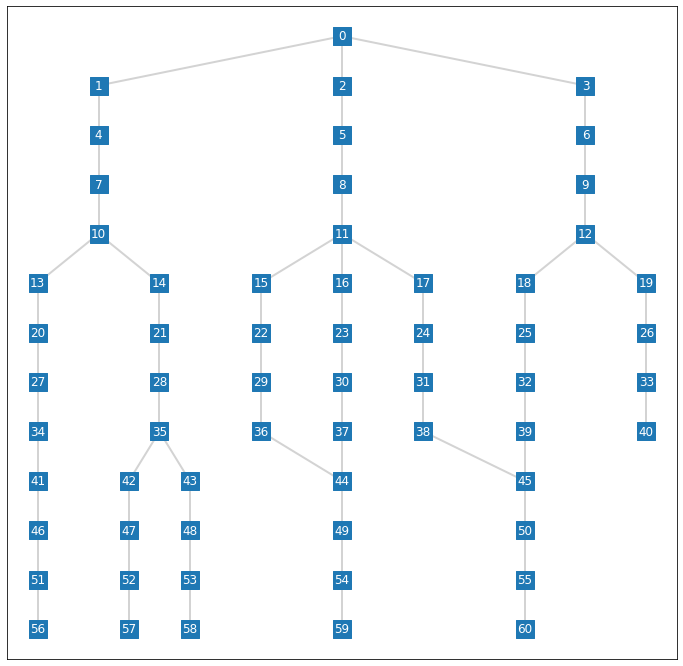

In [ ]:
plt.figure(num=None, figsize=(12, 12))
nx.draw_networkx(skel, pos, **options)
plt.show()

In [ ]:
g = estimate_cpdag(skel_graph=skel, sep_set=sep_set)

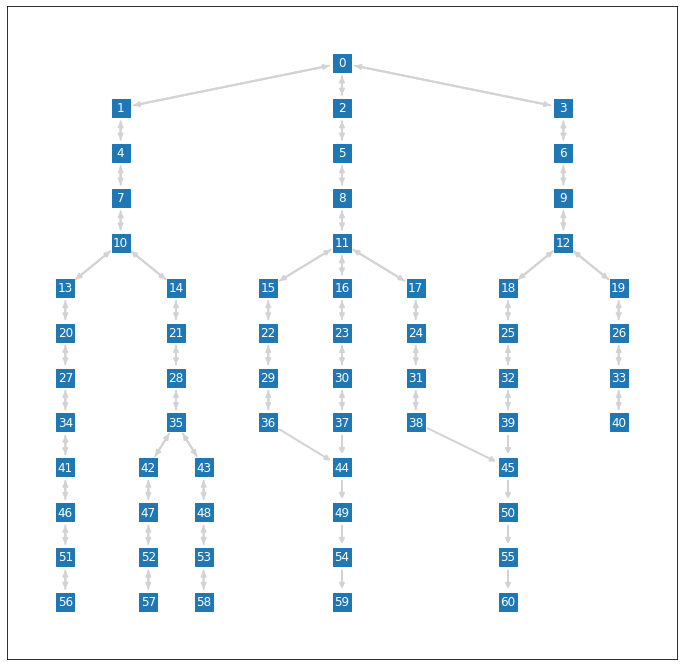

In [ ]:
plt.figure(num=None, figsize=(12, 12))
nx.draw_networkx(g, pos, **options)
plt.show()

In [ ]:
from pcalg import estimate_skeleton, estimate_cpdag
from gsq.ci_tests import ci_test_bin, ci_test_dis
from gsq.gsq_testdata import bin_data, dis_data


dm = np.array(bin_data).reshape((5000, 5))
(g, sep_set) = estimate_skeleton(indep_test_func=ci_test_bin,
                                  data_matrix=dm,
                                  alpha=0.01)
g = estimate_cpdag(skel_graph=g, sep_set=sep_set)
g_answer = nx.DiGraph()
g_answer.add_nodes_from([0, 1, 2, 3, 4])
g_answer.add_edges_from([(0, 1), (2, 3), (3, 2), (3, 1),
                             (2, 4), (4, 2), (4, 1)])
print('Edges are:', g.edges(), end='')
if nx.is_isomorphic(g, g_answer):
  print(' => GOOD')
else:
  print(' => WRONG')
  print('True edges should be:', g_answer.edges())

#dm = np.array(dis_data).reshape((10000, 5))
#(g, sep_set) = estimate_skeleton(indep_test_func=ci_test_dis,
#                                     data_matrix=dm,
#                                     alpha=0.01,
#                                     levels=[3,2,3,4,2])
#g = estimate_cpdag(skel_graph=g, sep_set=sep_set)
#g_answer = nx.DiGraph()
#g_answer.add_nodes_from([0, 1, 2, 3, 4])
#g_answer.add_edges_from([(0, 2), (1, 2), (1, 3), (4, 3)])
#print('Edges are:', g.edges(), end='')
#if nx.is_isomorphic(g, g_answer):
#  print(' => GOOD')
#else:
#  print(' => WRONG')
#  print('True edges should be:', g_answer.edges())

Edges are: [(0, 1), (2, 3), (2, 4), (3, 1), (3, 2), (4, 1), (4, 2)] => GOOD


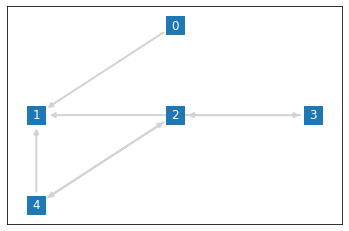

In [ ]:
nx.draw_networkx(g, pos, **options)
plt.show()

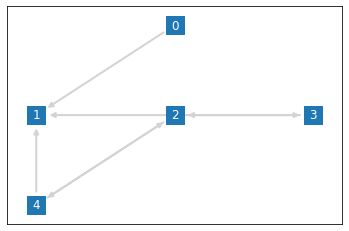

In [ ]:
nx.draw_networkx(g_answer, pos, **options)
plt.show()

In [ ]:
X.shape

(61, 10000)